### Gmarket
- 베스트 상품 200개 데이터 수집
- 상품의 이미지 200개 다운로드

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### 1. URL 찾기

In [2]:
url = 'https://corners.gmarket.co.kr/bestsellers'

#### 2. request > response : str(html)

In [3]:
response = requests.get(url)
response

<Response [200]>

#### 3. bs > DataFrame

In [5]:
dom = BeautifulSoup(response.text, 'html.parser')

In [6]:
elements = dom.select('#gBestWrap > div > div:nth-child(5) > div > ul > li')
len(elements)

200

In [8]:
element = elements[0]

In [20]:
data = {
    'title': element.select_one('.itemname').text,
    'link': element.select_one('.itemname').get('href'),
    'img': 'http:' + element.select_one('img').get('data-original'),
    'o_price': element.select_one('.o-price').text,
    's_price': element.select_one('.s-price').text.strip().split('\n')[0],
}
data

{'title': '[매일유업]매일 상하멸균우유/케일주스/요미요미24팩모음',
 'link': 'http://item.gmarket.co.kr/Item?goodscode=2628342593&ver=638122426388126623',
 'img': 'http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714',
 'o_price': '정가33,800원',
 's_price': '할인가23,700원'}

In [22]:
data = []
for element in elements:
    data.append({
        'title': element.select_one('.itemname').text,
        'link': element.select_one('.itemname').get('href'),
        'img': 'http:' + element.select_one('img').get('data-original'),
        'o_price': element.select_one('.o-price').text,
        's_price': element.select_one('.s-price').text.strip().split('\n')[0],
    })
df = pd.DataFrame(data)
df.tail(2)

,title,link,img,o_price,s_price
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"정가43,000원","할인가12,900원"
199,[길벗스쿨]길벗스쿨_언어천재 말놀이 세트(본책9권+꾸러미북1권+스티커북1권+말놀이 ...,http://item.gmarket.co.kr/Item?goodscode=27917...,http://gdimg.gmarket.co.kr/2791705618/still/30...,"정가96,000원","할인가80,000원"


In [34]:
# update : 데이터선택 = 수정할데이터
idx = df[df['o_price'] == ''].index
df['o_price'].loc[idx] = df['s_price'].loc[idx]
df[20:40].head()

,title,link,img,o_price,s_price
20,[압타밀]압타밀 프로푸트라 HMO 2단계 800g x 6통 세트,http://item.gmarket.co.kr/Item?goodscode=25037...,http://gdimg.gmarket.co.kr/2503772943/still/30...,"할인가199,000원","할인가199,000원"
21,[도루코]베이직 파스텔 주방가위 1+1특가(색상랜덤) + 집게증정 /우수한절삭력,http://item.gmarket.co.kr/Item?goodscode=21508...,http://gdimg.gmarket.co.kr/2150845686/still/30...,"할인가7,900원","할인가7,900원"
22,[일동후디스]후디스 아이음료 과자 모음전,http://item.gmarket.co.kr/Item?goodscode=22631...,http://gdimg.gmarket.co.kr/2263121320/still/30...,"정가25,100원","할인가17,600원"
23,도드람한돈 생 삼겹살 500g 구이용,http://item.gmarket.co.kr/Item?goodscode=14907...,http://gdimg.gmarket.co.kr/1490710179/still/30...,"할인가11,800원","할인가11,800원"
24,[구글플레이]기프트코드 5만원 / 구글 기프트카드,http://item.gmarket.co.kr/Item?goodscode=16552...,http://gdimg.gmarket.co.kr/1655242060/still/30...,"정가50,000원","할인가47,500원"


In [41]:
# regex : 정규표현식
# 문자열 데이터를 특정 패턴으로 처리할때 사용하는 문법

In [37]:
import re
price = '할인가1,111,800원'
re.findall('[0-9,]+', price)[0]

'1,111,800'

In [40]:
df['o_price'] = df['o_price'].apply(lambda price: re.findall('[0-9,]+', price)[0])
df['s_price'] = df['s_price'].apply(lambda price: re.findall('[0-9,]+', price)[0])
df.tail(2)

,title,link,img,o_price,s_price
198,레인보우 중목 라인양말_10+10켤레 세트 (할인특가),http://item.gmarket.co.kr/Item?goodscode=27936...,http://gdimg.gmarket.co.kr/2793644100/still/30...,"43,000","12,900"
199,[길벗스쿨]길벗스쿨_언어천재 말놀이 세트(본책9권+꾸러미북1권+스티커북1권+말놀이 ...,http://item.gmarket.co.kr/Item?goodscode=27917...,http://gdimg.gmarket.co.kr/2791705618/still/30...,"96,000","80,000"


In [42]:
txt = '저의 이메일 주소는 pdj1224@gmail.com과 pdj.1224@naver.com입니다.'
re.findall('[a-zA-Z0-9.]+@[a-z]+\.[a-z]+', txt)

['pdj1224@gmail.com', 'pdj.1224@naver.com']

#### 4. download image

In [44]:
# 이미지 파일 저장할 디렉토리

In [51]:
import os
dir_name = 'data'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

In [52]:
img_link = df.loc[0, 'img']
print(img_link)

http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714


In [53]:
response = requests.get(img_link)
response

<Response [200]>

In [55]:
with open('data/test.png', 'wb') as file:
    file.write(response.content)

In [56]:
%ls data

 C 드라이브의 볼륨: 로컬 디스크
 볼륨 일련 번호: 8A64-4954

 C:\Users\User\web_crawling\data 디렉터리

2023-02-17  오후 03:53    <DIR>          .
2023-02-17  오후 03:53    <DIR>          ..
2023-02-17  오후 03:53            33,866 test.png
               1개 파일              33,866 바이트
               2개 디렉터리  349,829,222,400 바이트 남음


In [57]:
# pillow : 파이썬에서 이미지 전처리를 하는 패키지
from PIL import Image as pil

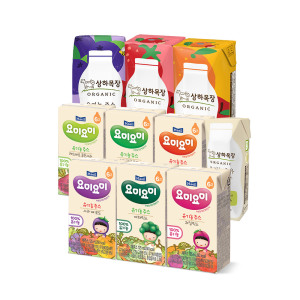

In [58]:
pil.open('data/test.png')

In [69]:
for idx, data in df[:20].iterrows():
    filename = '0' * (3 - len(str(idx))) + str(idx)
    filename = f'data/{filename}.png'
    print(idx, data['img'], filename)
    response = requests.get(data['img'])
    with open(filename, 'wb') as file:
        file.write(response.content)

0 http://gdimg.gmarket.co.kr/2628342593/still/300?ver=2023021714 data/000.png
1 http://gdimg.gmarket.co.kr/1998535842/still/300?ver=2023021714 data/001.png
2 http://gdimg.gmarket.co.kr/2772877848/still/300?ver=2023021714 data/002.png
3 http://gdimg.gmarket.co.kr/2767818438/still/300?ver=2023021714 data/003.png
4 http://gdimg.gmarket.co.kr/2780877061/still/300?ver=2023021714 data/004.png
5 http://gdimg.gmarket.co.kr/2762345389/still/300?ver=2023021714 data/005.png
6 http://gdimg.gmarket.co.kr/182821824/still/300?ver=2023021714 data/006.png
7 http://gdimg.gmarket.co.kr/1977052165/still/300?ver=2023021714 data/007.png
8 http://gdimg.gmarket.co.kr/2635078880/still/300?ver=2023021714 data/008.png
9 http://gdimg.gmarket.co.kr/2347262038/still/300?ver=2023021714 data/009.png
10 http://gdimg.gmarket.co.kr/2090522905/still/300?ver=2023021714 data/010.png
11 http://gdimg.gmarket.co.kr/2779014323/still/300?ver=2023021714 data/011.png
12 http://gdimg.gmarket.co.kr/2246382810/still/300?ver=20230217